<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=257232008" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset-full/bank-full.csv
/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz
%pip install xlearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 99.1 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is 

In [4]:
# Update to compatible versions
!pip install autogluon==1.1.1 xgboost==2.0.3
# Restart kernel after installation

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-api-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 27.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 104.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 22.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 95.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 91.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 140.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
#%pip freeze > requirements.txt

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML
import xlearn as xl

In [7]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [8]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')
original_df = pd.read_csv('/kaggle/input/bank-marketing-dataset-full/bank-full.csv', delimiter=';')

In [9]:
!ls /kaggle/input/playground-series-s5e8

sample_submission.csv  test.csv  train.csv


In [10]:
train_df.shape, original_df.shape

((750000, 17), (45211, 17))

In [11]:
train_df.shape, original_df.shape

((750000, 17), (45211, 17))

## Exploratory Data Analysis

In [12]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [13]:
original_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
# Map 'yes'/'no' to 1/0 in the target variable 'y'
original_df['y'] = original_df['y'].map({'yes': 1, 'no': 0})
original_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [15]:
train_df = pd.concat([train_df, original_df], ignore_index=True)
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
795207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
795208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
795209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [16]:
# Read first few lines as text to see the actual format
with open('/kaggle/input/bank-marketing-dataset-full/bank-full.csv', 'r') as f:
    for i in range(3):
        print(repr(f.readline()))

'"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"\n'
'58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"\n'
'44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"\n'


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795211 entries, 0 to 795210
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        795211 non-null  int64 
 1   job        795211 non-null  object
 2   marital    795211 non-null  object
 3   education  795211 non-null  object
 4   default    795211 non-null  object
 5   balance    795211 non-null  int64 
 6   housing    795211 non-null  object
 7   loan       795211 non-null  object
 8   contact    795211 non-null  object
 9   day        795211 non-null  int64 
 10  month      795211 non-null  object
 11  duration   795211 non-null  int64 
 12  campaign   795211 non-null  int64 
 13  pdays      795211 non-null  int64 
 14  previous   795211 non-null  int64 
 15  poutcome   795211 non-null  object
 16  y          795211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.1+ MB


In [18]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [20]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


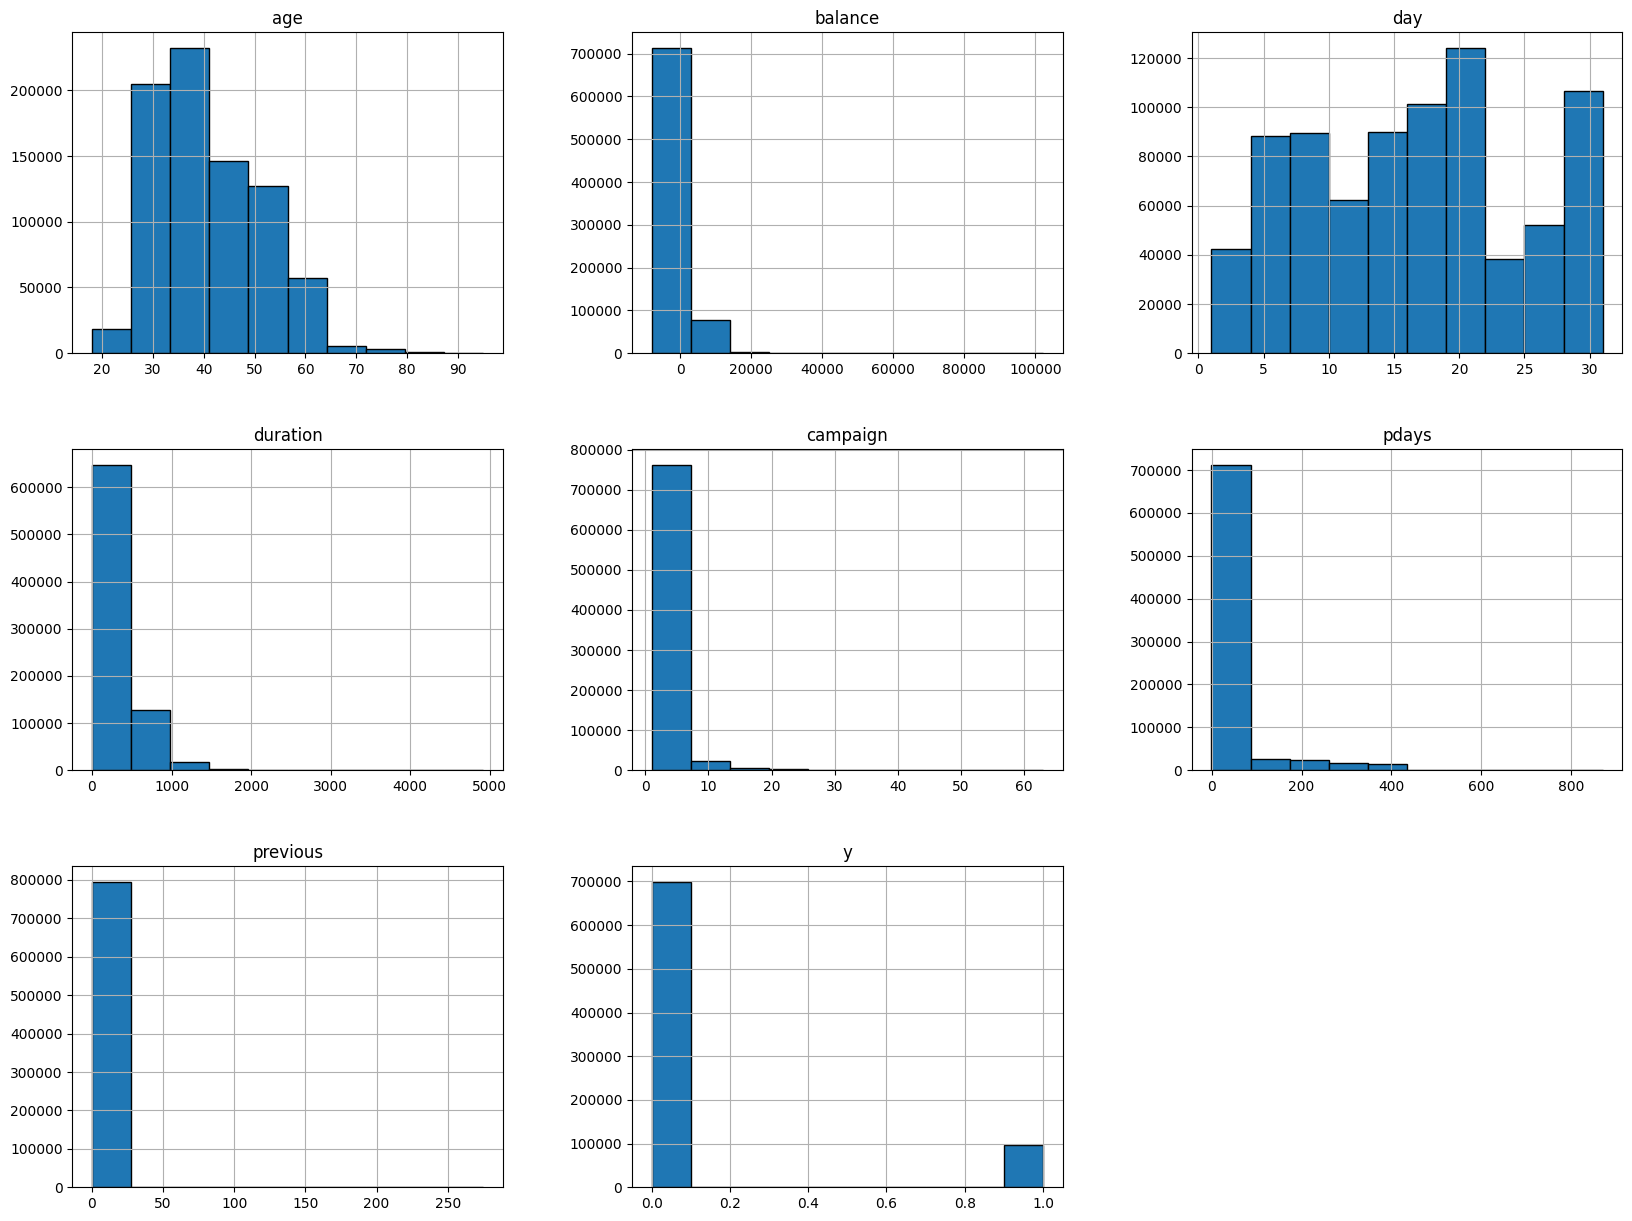

In [21]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [22]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,795211.0,40.926953,10.129098,18.0,33.0,39.0,48.0,95.0
balance,795211.0,1213.061980,2848.603881,-8019.0,0.0,624.0,1390.0,102127.0
day,795211.0,16.099540,8.255231,1.0,9.0,17.0,21.0,31.0
duration,795211.0,256.339096,271.723766,0.0,91.0,135.0,347.5,4918.0
campaign,795211.0,2.587630,2.741838,1.0,1.0,2.0,3.0,63.0
pdays,795211.0,23.423889,78.901465,-1.0,-1.0,-1.0,-1.0,871.0
previous,795211.0,0.314566,1.410369,0.0,0.0,0.0,0.0,275.0
y,795211.0,0.120442,0.325478,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [23]:
splits = RandomSplitter(valid_pct=0.2)(range_of(original_df))

In [24]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [25]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [26]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [27]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [28]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
3753,10,1,2,2,2,2,2,9,4,-0.287557,-0.403737,-0.981173,2.934938,0.540841,-0.301679,-0.22433
16579,5,2,3,1,1,2,2,6,4,-0.089886,-0.405083,1.690864,-0.474805,-0.208118,-0.301679,-0.22433
7122,4,3,3,1,1,1,1,7,4,-1.275911,0.738735,-1.466998,0.683774,-0.582597,-0.301679,-0.22433
26411,2,2,2,1,2,1,3,9,4,-0.781734,-0.398356,0.476302,1.072412,-0.208118,-0.301679,-0.22433
14557,10,2,2,1,1,1,1,2,4,0.404291,-0.405083,-0.373892,-0.357480,-0.208118,-0.301679,-0.22433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9060,5,2,3,1,1,1,1,10,4,0.107785,-0.405083,0.233389,0.639778,-0.582597,-0.301679,-0.22433
24320,5,1,3,1,2,1,1,2,4,1.293809,-0.405083,-1.102630,-0.551799,-0.208118,-0.301679,-0.22433
9366,5,2,3,1,2,1,3,7,4,0.305455,0.049956,0.476302,-0.900106,8.779380,-0.301679,-0.22433
8862,5,3,3,1,1,1,1,6,4,-0.089886,-0.405083,0.597758,-0.581130,-0.582597,-0.301679,-0.22433


Below we define a function to help us do stratified kfold cross validation which we use below

In [29]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## FFMS

## Neural Networks

In [30]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.033113110810518265, valley=0.0010000000474974513)

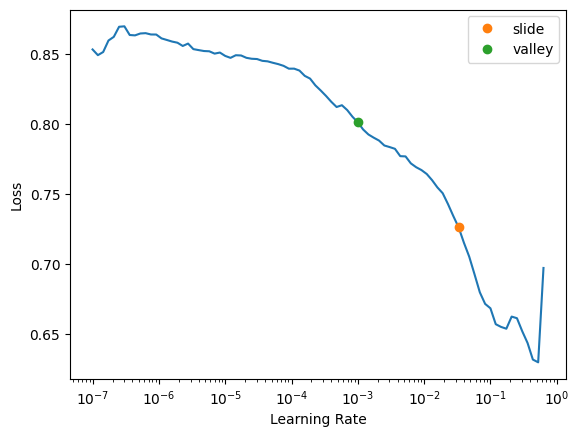

In [31]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [32]:
%%time
learn.fit_one_cycle(2, 1.025e-2)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.187811,0.194574,0.942708,00:05
1,0.170466,0.174964,0.952485,00:05


CPU times: user 11.8 s, sys: 47.2 ms, total: 11.8 s
Wall time: 11.9 s


In [33]:
dl = test_dl

In [34]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [35]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [36]:
a_preds.shape

torch.Size([250000, 2])

In [37]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [38]:
nn_preds_x

tensor([[9.9566e-01, 4.3368e-03],
        [9.9404e-01, 5.9583e-03],
        [9.9987e-01, 1.3265e-04],
        ...,
        [9.9898e-01, 1.0187e-03],
        [9.9941e-01, 5.9076e-04],
        [6.8703e-01, 3.1297e-01]])

In [39]:
nn_preds_y

tensor([[9.9662e-01, 3.3782e-03],
        [8.7709e-01, 1.2291e-01],
        [9.9988e-01, 1.1831e-04],
        ...,
        [2.2083e-01, 7.7917e-01],
        [9.9257e-01, 7.4302e-03],
        [8.7098e-01, 1.2902e-01]])

In [40]:
a_preds

tensor([[9.9662e-01, 3.3782e-03],
        [8.7709e-01, 1.2291e-01],
        [9.9988e-01, 1.1831e-04],
        ...,
        [2.2083e-01, 7.7917e-01],
        [9.9257e-01, 7.4302e-03],
        [8.7098e-01, 1.2902e-01]])

In [41]:
nn_preds_proba

tensor([3.3782e-03, 1.2291e-01, 1.1831e-04,  ..., 7.7917e-01, 7.4302e-03,
        1.2902e-01])

In [42]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([3.3782e-03, 1.2291e-01, 1.1831e-04,  ..., 7.7917e-01, 7.4302e-03,
        1.2902e-01])

In [43]:
final_preds.shape

torch.Size([250000])

In [44]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.003378
750001,0.122905
750002,0.000118
750003,0.001564
750004,0.048825
...,...
999995,0.000405
999996,0.035851
999997,0.779166


## Decision Trees

### Random Forests

In [45]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 9.84 s, sys: 40.9 ms, total: 9.88 s
Wall time: 9.87 s


0.9544125724067043

In [46]:
rf_preds_probs,rf_preds_probs.shape

(tensor([0.0000, 0.1623, 0.0048,  ..., 0.6669, 0.0016, 0.2560]),
 torch.Size([250000]))

In [47]:
rf_preds_probs 

tensor([0.0000, 0.1623, 0.0048,  ..., 0.6669, 0.0016, 0.2560])

In [48]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [49]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.450313
10,balance,0.098937
9,age,0.073835
7,month,0.064172
11,day,0.059842
8,poutcome,0.043058
14,pdays,0.039281
4,housing,0.033225
6,contact,0.032832
0,job,0.029606


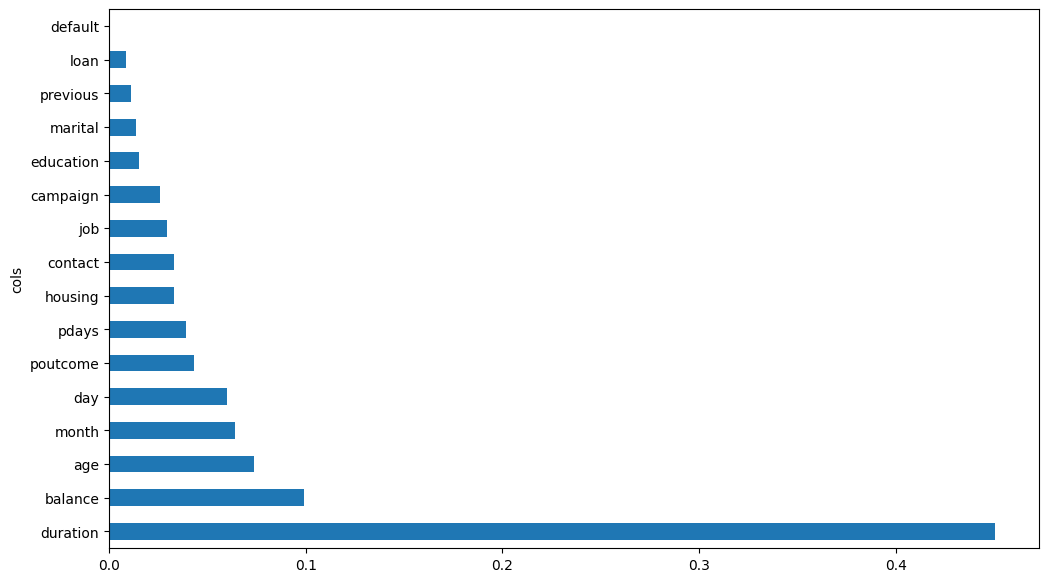

In [50]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [51]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

RandomForestClassifier(min_samples_leaf=3)

In [52]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.950261
Training fold 2/5...
Fold 2 roc_auc: 0.956404
Training fold 3/5...
Fold 3 roc_auc: 0.953142
Training fold 4/5...
Fold 4 roc_auc: 0.956058
Training fold 5/5...
Fold 5 roc_auc: 0.955712

Mean roc_auc: 0.954315


In [53]:
rf_oof_predictions.shape, rf_test_predictions.shape

((36169,), (9042,))

In [54]:
rf_oof_predictions

array([0.6312004 , 0.00749242, 0.60879656, ..., 0.        , 0.        , 0.08296279])

In [55]:
rf_test_predictions

array([8.48141981e-03, 2.65195819e-03, 4.22323789e-03, ..., 5.31722054e-05, 1.70000000e-03, 2.30431475e-01])

In [56]:
rf_mean_score, rf_fold_scores

(0.9543152816986193,
 [0.9502608874222122,
  0.9564041688946359,
  0.9531419561593014,
  0.9560577883828312,
  0.9557116076341159])

In [57]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000000
750001,0.162321
750002,0.004818
750003,0.003333
750004,0.055860
...,...
999995,0.003472
999996,0.178363
999997,0.666893


## Gradient Boosting

### XGBoost

In [58]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 1.83 s, sys: 27.2 ms, total: 1.86 s
Wall time: 983 ms


0.956917394798876

In [59]:
xgb_preds_proba

tensor([2.7510e-03, 5.3339e-02, 8.3052e-05,  ..., 8.7862e-01, 5.6234e-03,
        3.4912e-01])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

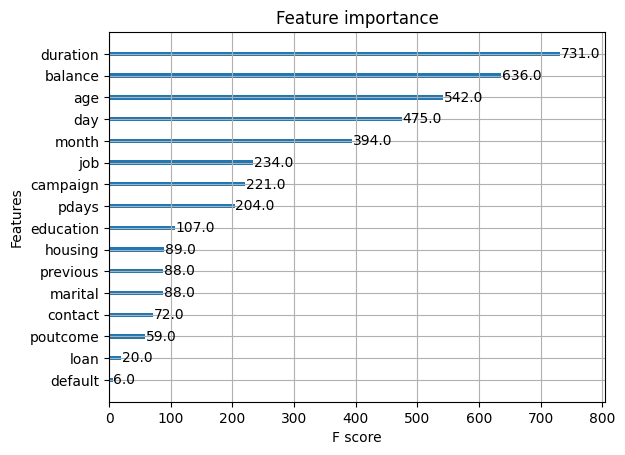

In [60]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [61]:
xgb_model = xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.953404
Training fold 2/5...
Fold 2 roc_auc: 0.956795
Training fold 3/5...
Fold 3 roc_auc: 0.955030
Training fold 4/5...
Fold 4 roc_auc: 0.958400
Training fold 5/5...
Fold 5 roc_auc: 0.956892

Mean roc_auc: 0.956104


In [63]:
xgb_oof_predictions

array([4.93404686e-01, 8.10408616e-04, 6.13119185e-01, ..., 5.31600272e-05, 3.80768371e-03, 4.25518118e-02])

In [64]:
xgb_test_predictions

array([0.0090983 , 0.00053499, 0.0005463 , ..., 0.00017328, 0.00018263, 0.1124399 ])

In [65]:
xgb_mean_score

0.9561041869180628

In [66]:
 xgb_fold_scores

[0.9534043846432836,
 0.9567945413441785,
 0.9550298464242349,
 0.9584004710631605,
 0.9568916911154562]

In [67]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002751
750001,0.053339
750002,0.000083
750003,0.000158
750004,0.040725
...,...
999995,0.000589
999996,0.040765
999997,0.878616


### LGBM

In [68]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 4390, number of negative: 31779
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 980
[LightGBM] [Info] Number of data points in the train set: 36169, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121375 -> initscore=-1.979476
[LightGBM] [Info] Start training from score -1.979476
CPU times: user 3.67 s, sys: 41.5 ms, total: 3.71 s
Wall time: 1.9 s


0.957565441813616

In [69]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[0.9936, 0.0064],
         [0.7957, 0.2043],
         [0.9988, 0.0012],
         ...,
         [0.2926, 0.7074],
         [0.9983, 0.0017],
         [0.7042, 0.2958]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

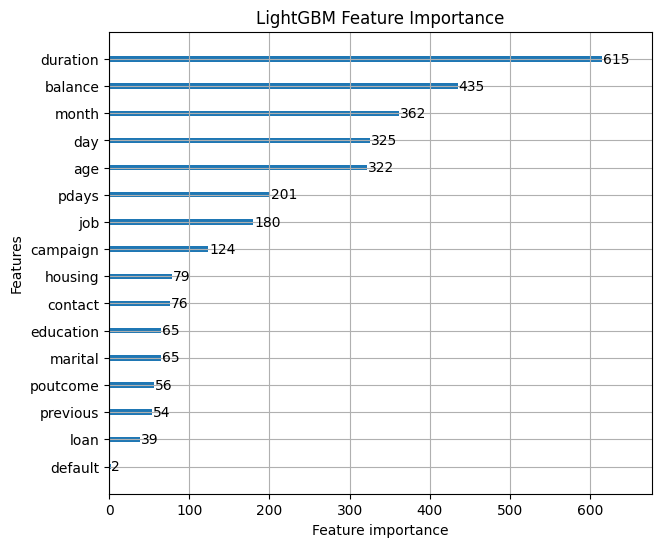

In [70]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [71]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

LGBMClassifier()

In [72]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 3512, number of negative: 25423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 28935, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121375 -> initscore=-1.979469
[LightGBM] [Info] Start training from score -1.979469
Fold 1 roc_auc: 0.955490
Training fold 2/5...
[LightGBM] [Info] Number of positive: 3512, number of negative: 25423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the t

In [73]:
lgbm_oof_predictions

array([5.29974401e-01, 3.77952600e-03, 7.28324752e-01, ..., 3.66499845e-04, 3.72326853e-03, 2.95691549e-02])

In [74]:
lgbm_test_predictions

array([0.00825996, 0.00226605, 0.00113272, ..., 0.00098955, 0.00148902, 0.19841945])

In [75]:
 lgbm_mean_score

0.9583714730053716

In [76]:
lgbm_fold_scores

[0.9554898354432738,
 0.9602415022986908,
 0.9570023158932928,
 0.9597024890656292,
 0.9594212223259715]

In [77]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.006367
750001,0.204296
750002,0.001218
750003,0.000789
750004,0.057177
...,...
999995,0.000906
999996,0.073619
999997,0.707430


### CatBoost

In [78]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 27.4 s, sys: 3.9 s, total: 31.3 s
Wall time: 8.18 s


0.9595417642448245

#### CatBoost Feature Importance

In [79]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   38.039766
6    contact   10.244297
10   balance    9.434547
7      month    9.230177
11       day    5.965736
9        age    4.573393
4    housing    4.548786
13  campaign    3.592316
0        job    3.065403
8   poutcome    2.486073


#### Cross validation - CatBoost

In [80]:
cat_model = CatBoostClassifier()
cat_model

In [81]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.043347
0:	learn: 0.6244539	total: 7.49ms	remaining: 7.48s
1:	learn: 0.5664068	total: 13.6ms	remaining: 6.78s
2:	learn: 0.5131936	total: 19.5ms	remaining: 6.5s
3:	learn: 0.4713166	total: 25.5ms	remaining: 6.36s
4:	learn: 0.4347126	total: 31.6ms	remaining: 6.28s
5:	learn: 0.4035733	total: 37.7ms	remaining: 6.24s
6:	learn: 0.3749043	total: 43.8ms	remaining: 6.21s
7:	learn: 0.3531334	total: 49.6ms	remaining: 6.16s
8:	learn: 0.3337691	total: 55.7ms	remaining: 6.13s
9:	learn: 0.3163560	total: 61.4ms	remaining: 6.08s
10:	learn: 0.3013840	total: 67.2ms	remaining: 6.04s
11:	learn: 0.2944597	total: 73.2ms	remaining: 6.03s
12:	learn: 0.2829796	total: 79.4ms	remaining: 6.03s
13:	learn: 0.2729630	total: 85.3ms	remaining: 6.01s
14:	learn: 0.2676620	total: 91.6ms	remaining: 6.02s
15:	learn: 0.2597758	total: 97.5ms	remaining: 5.99s
16:	learn: 0.2545415	total: 103ms	remaining: 5.98s
17:	learn: 0.2489793	total: 110ms	remaining: 5.98s
18:	learn: 0.2431231	total

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [82]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([5.5336e-03, 1.0732e-01, 1.0743e-04,  ..., 9.2172e-01, 4.5475e-03,
        3.0752e-01])

In [83]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([0.0109, 0.0009, 0.0003,  ..., 0.0006, 0.0004, 0.1487])

In [84]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.9598162125521688

#### CatBoost + LGBM

In [85]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([7.3414e-03, 1.8280e-01, 6.7471e-04,  ..., 8.3613e-01, 2.6010e-03,
        2.8085e-01])

In [86]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([9042])

In [87]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9600761565724193

#### XGBoost + LGBM

In [88]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([4.5588e-03, 1.2882e-01, 6.5033e-04,  ..., 7.9302e-01, 3.6769e-03,
        3.2244e-01])

In [89]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.9587106006055314

In [90]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.004559
750001,0.128817
750002,0.000650
750003,0.000474
750004,0.048951
...,...
999995,0.000748
999996,0.057192
999997,0.793023


#### CatBoost + LGBM + XGBoost

In [91]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([5.8112e-03, 1.3965e-01, 4.7749e-04,  ..., 8.5029e-01, 3.6085e-03,
        3.0360e-01])

In [92]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9600800092736785

### Stacking

In [93]:
stacking_estimators = [
    ('cat_boost',cat_model),
    #('rf',rf_model),
    ('lgbm',lgbm_model),
    ('xgb',xgb_model),
]

#stacking_classifier_cat_xgb_lgbm= StackingClassifier(
    #estimators=stacking_estimators,
    #final_estimator=LogisticRegression(),
    #cv=5
#)
stacking_classifier_cat_lgbm= StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=lgb.LGBMClassifier(),
    cv=5
)
stacking_classifier_cat_lgbm.fit(X_train, y_train)


stacking_preds_cat_lgbm = (stacking_classifier_cat_lgbm.predict_proba(test_dl.xs))[:,1]
stacking_preds_cat_lgbm_x = (stacking_classifier_cat_lgbm.predict_proba(X_test))[:,1]

stacking_score_cat_lgbm = roc_auc_score(y_test, stacking_preds_cat_lgbm_x)

print(f"Final Stacking Classifier ROC_AUC on test set: {stacking_score_cat_lgbm}")

print(f"Final Stacking Classifier ROC_AUC on test set: {stacking_score_cat_lgbm}")

Learning rate set to 0.047681
0:	learn: 0.6189994	total: 9.35ms	remaining: 9.34s
1:	learn: 0.5583043	total: 16.5ms	remaining: 8.23s
2:	learn: 0.5077172	total: 23.6ms	remaining: 7.86s
3:	learn: 0.4610990	total: 30.5ms	remaining: 7.59s
4:	learn: 0.4221541	total: 37.8ms	remaining: 7.51s
5:	learn: 0.3894481	total: 44.4ms	remaining: 7.36s
6:	learn: 0.3640546	total: 51ms	remaining: 7.24s
7:	learn: 0.3478178	total: 57.6ms	remaining: 7.15s
8:	learn: 0.3281890	total: 64.7ms	remaining: 7.13s
9:	learn: 0.3113387	total: 71.4ms	remaining: 7.06s
10:	learn: 0.2966769	total: 78.1ms	remaining: 7.02s
11:	learn: 0.2847326	total: 85ms	remaining: 7s
12:	learn: 0.2784028	total: 91.4ms	remaining: 6.94s
13:	learn: 0.2677681	total: 98.5ms	remaining: 6.93s
14:	learn: 0.2623366	total: 105ms	remaining: 6.92s
15:	learn: 0.2541549	total: 112ms	remaining: 6.89s
16:	learn: 0.2494723	total: 119ms	remaining: 6.87s
17:	learn: 0.2431673	total: 126ms	remaining: 6.86s
18:	learn: 0.2374808	total: 133ms	remaining: 6.84s
19:	

In [94]:
stacking_preds_cat_lgbm.shape

(250000,)

In [95]:
stacking_preds_cat_lgbm = torch.tensor(stacking_preds_cat_lgbm)

In [96]:
stacking_preds_cat_lgbm

tensor([8.6201e-04, 2.6813e-01, 7.3161e-05,  ..., 8.8740e-01, 1.0507e-03,
        1.8226e-01], dtype=torch.float64)

In [97]:
!rm submission.csv
sub_df['y'] = stacking_preds_cat_lgbm 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000862
750001,0.268132
750002,0.000073
750003,0.000229
750004,0.067022
...,...
999995,0.000122
999996,0.063151
999997,0.887396


## AutoML

### AutoGluon

In [98]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
Time_limit = 3600*10
#Time_limit = 3600
problem_type='binary'

In [99]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    ag_args_fit={'num_gpus': 2}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    
    #}
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250821_044739"
2025-08-21 04:47:40,026	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-21 04:47:43,220	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=1660) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 warning generated.
(_ray_fit pid=1660) 1 

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3   0.969130     roc_auc    1144.540447  24759.123891                0.145451         101.297655            3       True         32
1              XGBoost_BAG_L2   0.968910     roc_auc    1079.832628  17634.860358                3.445927         112.219696            2       True         26
2        LightGBMLarge_BAG_L2   0.968850     roc_auc    1084.264599  17779.496712                7.877898         256.856050            2       True         28
3             LightGBM_BAG_L2   0.968821     roc_auc    1082.192742  17702.877156                5.806041         180.236494            2       True         19
4      NeuralNetFastAI_BAG_L2   0.968803     roc_auc    1083.035815  21158.073757                6.649114        3635.433095            2 

In [100]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [101]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3   0.969130     roc_auc    1144.540447  24759.123891                0.145451         101.297655            3       True         32
1              XGBoost_BAG_L2   0.968910     roc_auc    1079.832628  17634.860358                3.445927         112.219696            2       True         26
2        LightGBMLarge_BAG_L2   0.968850     roc_auc    1084.264599  17779.496712                7.877898         256.856050            2       True         28
3             LightGBM_BAG_L2   0.968821     roc_auc    1082.192742  17702.877156                5.806041         180.236494            2       True         19
4      NeuralNetFastAI_BAG_L2   0.968803     roc_auc    1083.035815  21158.073757                6.649114        3635.433095            2 

In [102]:
%%time
predictor.leaderboard()

CPU times: user 5.87 ms, sys: 3.99 ms, total: 9.86 ms
Wall time: 9.2 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.969130,roc_auc,1144.540447,24759.123891,0.145451,101.297655,3,True,32
1,XGBoost_BAG_L2,0.968910,roc_auc,1079.832628,17634.860358,3.445927,112.219696,2,True,26
2,LightGBMLarge_BAG_L2,0.968850,roc_auc,1084.264599,17779.496712,7.877898,256.856050,2,True,28
3,LightGBM_BAG_L2,0.968821,roc_auc,1082.192742,17702.877156,5.806041,180.236494,2,True,19
4,NeuralNetFastAI_BAG_L2,0.968803,roc_auc,1083.035815,21158.073757,6.649114,3635.433095,2,True,25
5,LightGBMXT_BAG_L2,0.968744,roc_auc,1095.950635,17840.530385,19.563935,317.889723,2,True,18
6,CatBoost_BAG_L2,0.968650,roc_auc,1077.210793,17765.540982,0.824092,242.900319,2,True,22
7,NeuralNetTorch_BAG_L2,0.968447,roc_auc,1084.060704,19893.515437,7.674003,2370.874775,2,True,27
8,RandomForestEntr_BAG_L2,0.968394,roc_auc,1117.923962,18039.542301,41.537261,516.901639,2,True,21
9,ExtraTreesEntr_BAG_L2,0.968327,roc_auc,1115.775755,17644.422345,39.389054,121.781683,2,True,24


In [103]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 45min 47s, sys: 9.93 s, total: 45min 57s
Wall time: 23min 10s


,0,1
id,,
750000,0.999339,0.000661
750001,0.950361,0.049639
750002,0.999755,0.000245
750003,0.999789,0.000211
750004,0.986688,0.013312


In [104]:
predictions = autogluon_preds_proba

In [105]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 43min 41s, sys: 9.88 s, total: 43min 51s
Wall time: 22min 4s


id
750000    0.000661
750001    0.049639
750002    0.000245
750003    0.000211
750004    0.013312
Name: y, dtype: float32

In [106]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [107]:
autogluon_preds_proba.values

array([6.6109258e-04, 4.9639218e-02, 2.4476598e-04, ..., 7.5702506e-01, 3.1586658e-04, 1.5165845e-01], dtype=float32)

In [108]:
autogluon_preds_proba_values = torch.tensor(autogluon_preds_proba.values)

In [109]:
autogluon_cat_lgbm_xgb_preds = (cat_lgbm_xgb_preds + autogluon_preds_proba_values)/2
autogluon_cat_lgbm_xgb_preds,autogluon_cat_lgbm_xgb_preds.shape

(tensor([3.2362e-03, 9.4642e-02, 3.6113e-04,  ..., 8.0366e-01, 1.9622e-03,
         2.2763e-01]),
 torch.Size([250000]))

In [110]:
#!rm submission.csv
#sub_df['y'] = autogluon_cat_lgbm_xgb_preds
#sub_df.to_csv('submission.csv', index=False)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

In [111]:
!rm submission.csv
sub_df['y'] = autogluon_preds_proba.values
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000661
750001,0.049639
750002,0.000245
750003,0.000211
750004,0.013312
...,...
999995,0.000166
999996,0.086486
999997,0.757025


In [112]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [113]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
7,CatBoost_XGB_LGBM_average,0.960080
5,CatBoost_LGBM_average,0.960076
4,CatBoost_XGB_average,0.959816
3,CatBoost,0.959542
6,XGB_LGBM_average,0.958711
2,LGBM,0.957565
1,XGBoost,0.956917
0,Random Forest,0.954413


In [114]:
(autogluon_preds_proba.values).shape

(250000,)